In [3]:
!pip install plotly

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [2]:
tasks = pd.read_csv('tasks.csv')
tasks = tasks.replace(np.nan,0)
tasks.head()

,id,name,done,project_id,creationDate,lastUpdateDateTime,type,type_code,scope,planningmode,...,totalLeftCost,totalValidatedCost,marginWork,marginCost,marginWorkPct,marginCostPct,plannedStartFraction,plannedEndFraction,validatedStartFraction,validatedEndFraction
0,1,Maintenance,0,2,2018-02-19,2018-02-19 16:17:24,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,Projet CARPA,0,2,2018-02-19,2018-02-19 16:18:49,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,3,Projet Tri / Réconciliation CHQ,0,2,2018-02-19,2018-02-19 16:20:07,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,4,AT Description,0,15,2018-02-19,2018-02-19 16:24:31,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,Modélisation,0,15,2018-02-19,2018-02-19 16:34:43,Task,TAS,Activity,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [3]:
status = {
"recorded": 1,
"qualified": 2,
"in progress": 3,
"done": 4,
"verified": 5,
"delivered": 6,
"closed": 7,
"re-opened": 8,
"cancelled": 9,
"assigned": 10,
"accepted": 11,
"validated": 12,
"prepared": 13,
"copied": 14
}
tp = {
"Task": 1
}
tasks =  tasks[['done','type','status','realWork','realCost','realDuration','progress']]
tasks["status"] = tasks["status"].map(status)
tasks["type"] = tasks["type"].map(tp)
tasks = tasks.replace(np.nan,0)
tasks

,done,type,status,realWork,realCost,realDuration,progress
0,0,1,1,17.25,0.0,93.0,100
1,0,1,1,44.25,0.0,87.0,100
2,0,1,1,27.00,0.0,95.0,100
3,0,1,1,0.50,0.0,1.0,100
4,0,1,1,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...
481,0,1,1,1.25,0.0,5.0,100
482,0,1,1,4.50,0.0,9.0,100
483,0,1,1,0.00,0.0,0.0,0
484,0,1,1,0.00,0.0,0.0,0


In [4]:
df.shape

(486, 7)

In [5]:
df.describe()

,done,type,status,realWork,realCost,realDuration,progress
count,486.0,486.0,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.0,1.0,1.179012,40.113498,192.644033,86.860082,76.598765
std,0.0,0.0,1.402079,147.163574,2536.072976,150.784809,42.115912
min,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,1.000000,0.750000,0.000000,1.000000,100.000000
50%,0.0,1.0,1.000000,6.000000,0.000000,23.500000,100.000000
75%,0.0,1.0,1.000000,23.262500,0.000000,90.750000,100.000000
max,0.0,1.0,14.000000,1693.250000,39500.000000,763.000000,100.000000


In [6]:
df.dtypes

done              int64
type              int64
status            int64
realWork        float64
realCost        float64
realDuration    float64
progress          int64
dtype: object

In [7]:
df.isnull().sum()

done            0
type            0
status          0
realWork        0
realCost        0
realDuration    0
progress        0
dtype: int64

In [8]:
plt.style.use('fivethirtyeight')

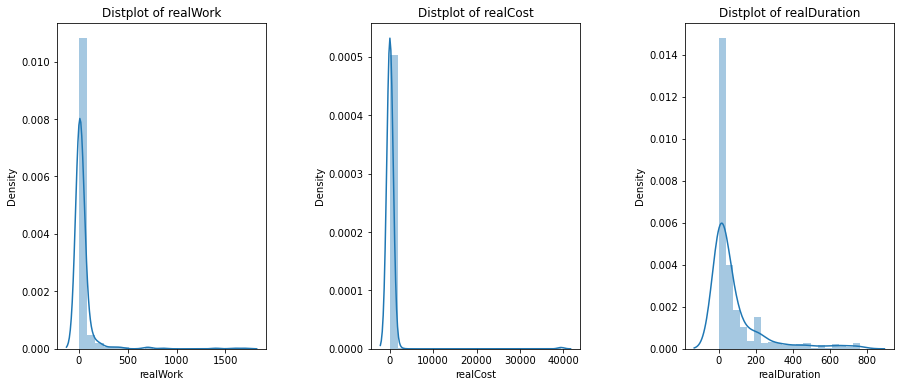

In [6]:
plt.figure(1 , figsize = (15 , 6))
n1 = 0 
for x in ['realWork' , 'realCost' , 'realDuration']:
    n1 += 1
    plt.subplot(1 , 3 , n1)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(tasks[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

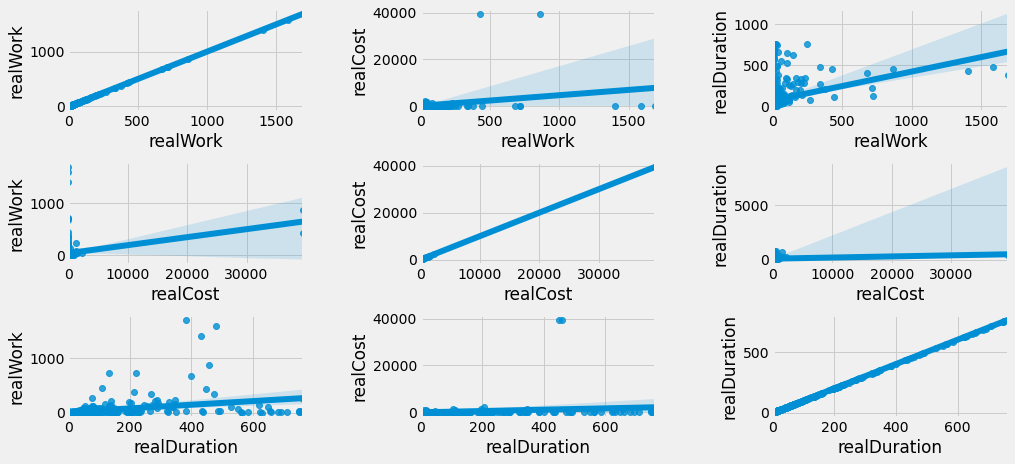

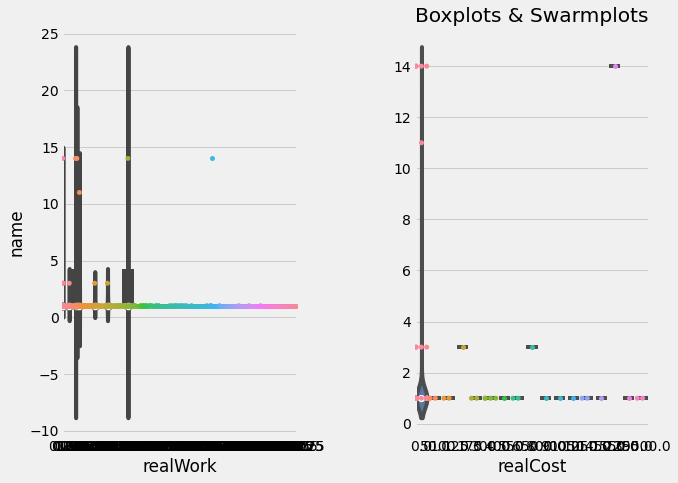

In [12]:
'''Profile and Role'''
X1 = df[['realDuration' , 'realCost']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

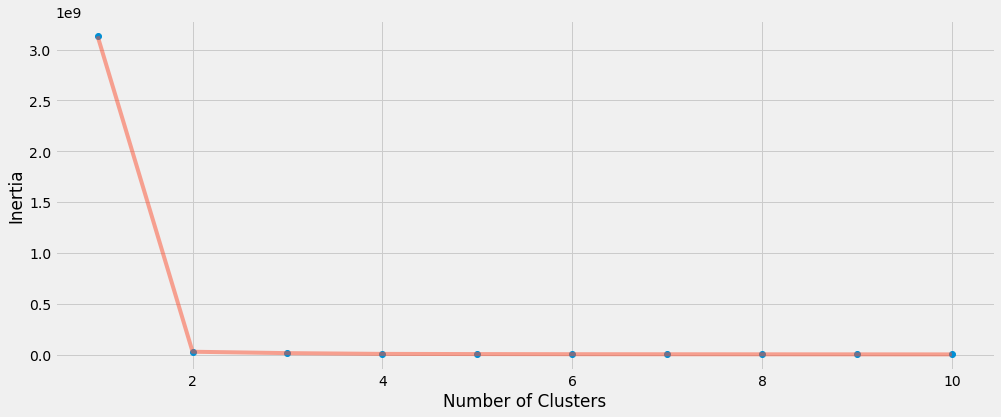

In [13]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [14]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [15]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

MemoryError: Unable to allocate 563. GiB for an array with shape (1975100, 38250) and data type float64

In [17]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'realWork' ,y = 'realCost' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('realWork') , plt.xlabel('realCost')
plt.show()

NameError: name 'Z' is not defined

<Figure size 1080x504 with 0 Axes>

In [18]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'realCost' ,y = 'realDuration' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('realCost') , plt.xlabel('realDuration')
plt.show()

NameError: name 'Z' is not defined

<Figure size 1080x504 with 0 Axes>

In [12]:
X33 = tasks[['realWork' , 'realCost' ,'realDuration']].iloc[: , :].values
inertiaa = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X33)
    inertiaa.append(algorithm.inertia_)

In [17]:
algorithmm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithmm.fit(X33)
labels33 = algorithmm.labels_
centroids3 = algorithmm.cluster_centers_

In [20]:
tasks['labels33'] =  labels33
trace1 = go.Scatter3d(
    x= tasks['realWork'],
    y= tasks['status'],
    z= tasks['realCost'],
    mode='markers',
     marker=dict(
        color = tasks['labels33'], 
        size= 20,
        line=dict(
            color= tasks['labels33'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'realWork'),
            yaxis = dict(title  = 'status'),
            zaxis = dict(title  = 'realCost')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)



<AxesSubplot:xlabel='realWork', ylabel='realCost'>

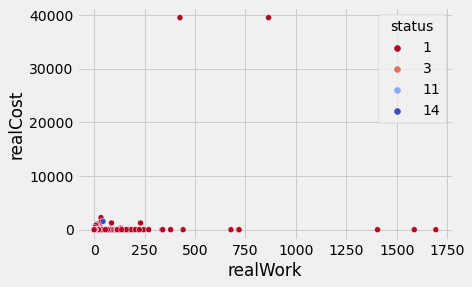

In [23]:
sns.scatterplot(data=df,x ="realWork",y="realCost", hue=df.status, palette="coolwarm_r")

In [38]:
import json


In [39]:
def plotly_global_timeseries():
    tasks['labels33'] =  labels33
    trace1 = go.Scatter3d(
        x= tasks['realWork'],
        y= tasks['status'],
        z= tasks['realCost'],
        mode='markers',
         marker=dict(
            color = tasks['labels33'], 
            size= 20,
            line=dict(
                color= tasks['labels33'],
                width= 12
            ),
            opacity=0.8
         )
    )
    data = [trace1]
    layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
        title= 'Clusters',
        scene = dict(
                xaxis = dict(title  = 'realWork'),
                yaxis = dict(title  = 'status'),
                zaxis = dict(title  = 'realCost')
            )
    )
    fig = go.Figure(data=data, layout=layout)
    plot_json = json.dumps(fig, cls=py.utils.PlotlyJSONEncoder)
    return plot_json

In [ ]:
import flask

import pickle

# Use pickle to load in the pre-trained model.


app = flask.Flask(__name__, template_folder='templates')

@app.route('/bb', methods=['GET', 'POST'])

def main():

    if flask.request.method == 'GET':
       
        prediction = plotly_global_timeseries()

        return flask.render_template('ach.html',

                                     result=prediction,)

if __name__ == '__main__':

    from werkzeug.serving import run_simple
    run_simple('localhost', 8000, app)